# Sign Language

## Data Exploration

In [1]:
import pandas as pd

In [2]:
! pwd

/home/mtaha5/code/mtaha5/sign-language/notebooks


In [3]:
df_train = pd.read_csv('../raw_data/sign_mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
df_test = pd.read_csv('../raw_data/sign_mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
import numpy as np
np.sqrt(784)

28.0

In [19]:
X_train = df_train.copy().drop('label', axis=1)
X_test = df_test.copy().drop('label', axis=1)

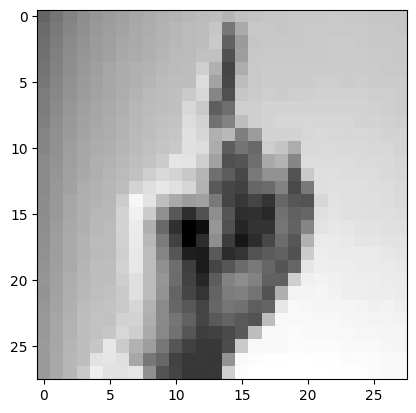

In [7]:
import matplotlib.pyplot as plt

img = X_train[:1]
plt.imshow(img.values.reshape(28,28), cmap='gray')

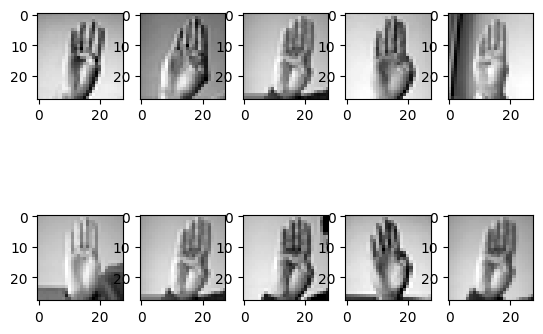

In [23]:
# exploring different lables
label = 1
label_df = df_train[df_train['label'] == label]
label_df_img = label_df.drop('label', axis=1)
for i in range (10):
    plt.subplot(2, 5, i+1)
    img = label_df_img[i:i+1]
    plt.imshow(img.values.reshape(28,28), cmap='gray')

In [10]:
df_train['label'].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [11]:
label_dict = {0: 'A', 
              1: 'B', 
              2: 'C',
              3: 'D', 
              4: 'E', 
              5: 'F', 
              6: 'G',
              7: 'H', 
              8: 'I', 
              9: '', 
              10: 'K',
              11: 'L', 
              12: 'M', 
              13: 'N', 
              14: 'O',
              15: 'P', 
              16: 'Q', 
              17: 'R', 
              18: 'S',
              19: 'T', 
              20: 'U', 
              21: 'V', 
              22: 'W',
              23: 'X', 
              24: 'Y',}

In [22]:
# missing letters (J, Z)

In [13]:
import seaborn as sns

<Axes: ylabel='Frequency'>

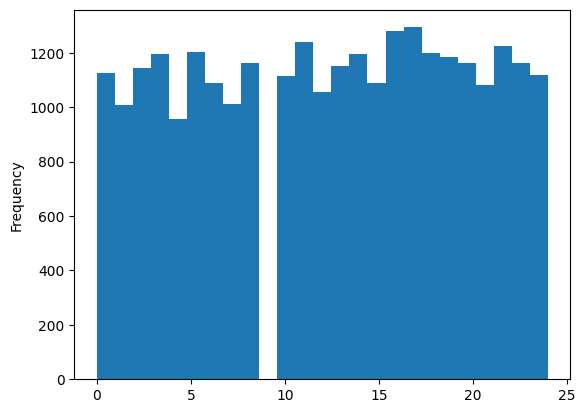

In [14]:
(df_train['label']).plot.hist(bins=25)

## Data Preprocessing

In [15]:
# image processing
X_train.shape

(27455, 784)

In [ ]:
X_train.describe()

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [30]:
y_train = df_train['label']
y_test = df_test['label']

In [31]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [34]:
y_cat_train.shape

(27455, 25)

In [36]:
X_train_scaled.shape[0]

27455

In [45]:
#reshaping X
X_train_reshape = X_train_scaled.values.reshape(X_train_scaled.shape[0], 28, 28)
X_test_reshape = X_test_scaled.values.reshape(X_test_scaled.shape[0], 28, 28)

In [46]:
from tensorflow.keras.backend import expand_dims
X_train_reshape = expand_dims(X_train_reshape, axis=3)
X_test_reshape = expand_dims(X_test_reshape, axis=3)


In [47]:
X_train_reshape.shape

TensorShape([27455, 28, 28, 1])

## CNN Model

In [48]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [49]:
def initialize_model():

    model = models.Sequential()

    model.add(layers.Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    

    model.add(layers.Dense(25, activation='softmax'))
    
    ### Model compilation
    model.compile(loss= 'categorical_crossentropy',
                  optimizer='adam' ,
                  metrics=['accuracy'])
    
    return model

In [50]:
model = initialize_model()

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5, restore_best_weights=True)

In [53]:
history = model.fit(X_train_reshape, y_cat_train, validation_split=0.2, 
                    epochs=100, batch_size = 32, callbacks=[es])

Epoch 1/100
687/687 [==============================] - 18s 26ms/step - loss: 1.9275 - accuracy: 0.3926 - val_loss: 0.7041 - val_accuracy: 0.7629
Epoch 2/100
687/687 [==============================] - 22s 33ms/step - loss: 0.5385 - accuracy: 0.8163 - val_loss: 0.3074 - val_accuracy: 0.8971
Epoch 3/100
687/687 [==============================] - 16s 24ms/step - loss: 0.2153 - accuracy: 0.9280 - val_loss: 0.0710 - val_accuracy: 0.9843
Epoch 4/100
687/687 [==============================] - 20s 29ms/step - loss: 0.0952 - accuracy: 0.9703 - val_loss: 0.0245 - val_accuracy: 0.9967
Epoch 5/100
687/687 [==============================] - 29s 42ms/step - loss: 0.0585 - accuracy: 0.9823 - val_loss: 0.0211 - val_accuracy: 0.9960
Epoch 6/100
687/687 [==============================] - 18s 26ms/step - loss: 0.0411 - accuracy: 0.9883 - val_loss: 0.0087 - val_accuracy: 0.9995
Epoch 7/100
687/687 [==============================] - 19s 27ms/step - loss: 0.0309 - accuracy: 0.9910 - val_loss: 0.0071 - val_ac

In [54]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1.1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

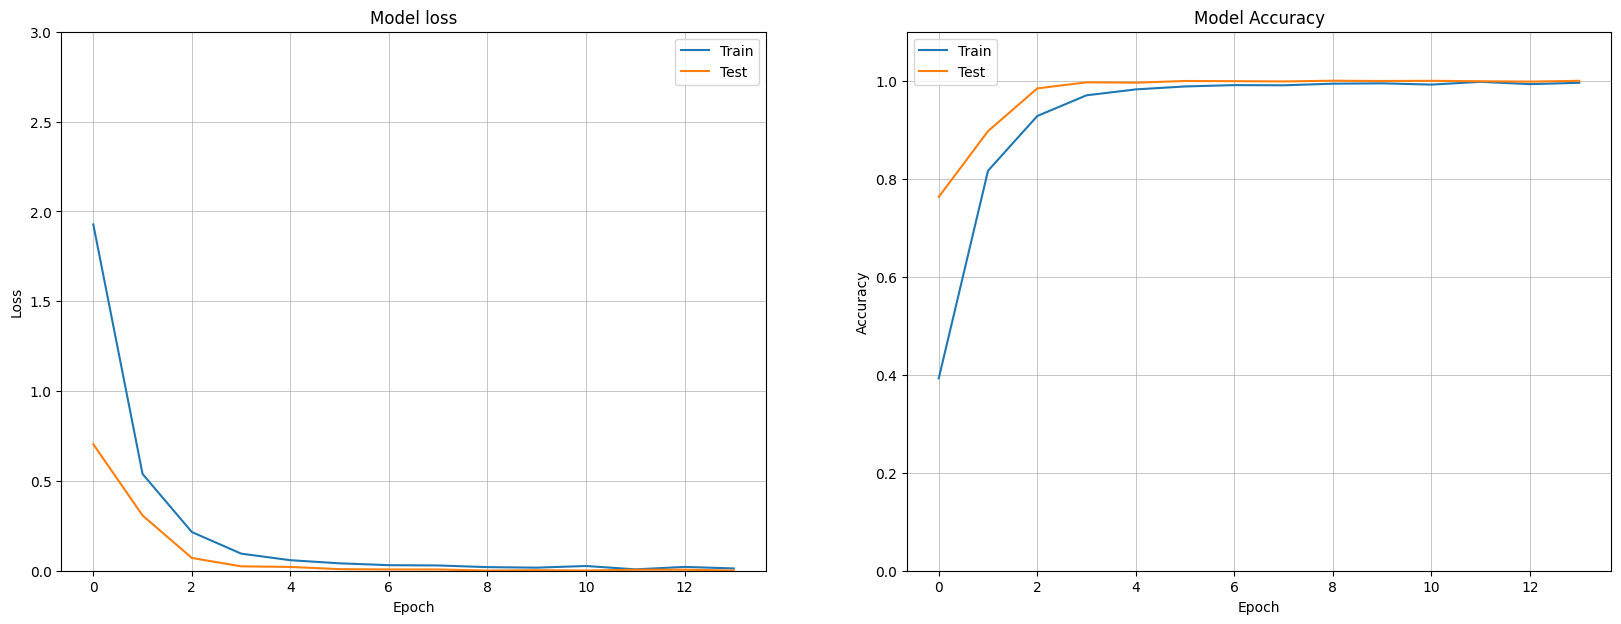

In [55]:
plot_loss_accuracy(history)

In [56]:
#evaluation

res = model.evaluate(X_test_reshape, y_cat_test)

225/225 [==============================] - 1s 6ms/step - loss: 0.5601 - accuracy: 0.9017
